In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
path = '/content/drive/My Drive/NNFL/data2.xlsx'
d = pd.read_excel(path, header=None)
n, m = d.shape

In [ ]:
data = np.array(d)
np.random.shuffle(data)

In [ ]:
def calcDis(x, y):
  s = 0
  h = x.shape[0]
  for i in range(h):
    s = s + (x[i] - y[i])**2
  s = s**0.5
  return s

def K_compute(n, K, centroids, data, cluster):

  # getting distances for each point from the centroid
  # and assigning the cluster for each point
  for i in range(n):
    p = data[i, :]
    dis = []
    for j in range(K):
      x = centroids[j, :]
      val = calcDis(x, p)
      dis.append(val)
    ind = dis.index(min(dis))
    cluster[i] = ind

  # assign new clusters
  new_clusters = []
  for i in range(K):
    sum = 0
    count = 0
    for j in range(n):
      if cluster[j] == i:
        p = data[j, :]
        sum = sum + p
        count = count + 1
    temp = sum / count
    new_clusters.append(temp)

  new_clusters = np.array(new_clusters)
  return new_clusters, cluster


# centroids: np array
# data: np.array
# cluster: list

def KMeans(n, K, iterations, centroids, data):
  cluster = []
  for i in range(n):
    cluster.append(-1)

  for iter in range(iterations):
    centroids, cluster = K_compute(n, K, centroids, data, cluster)

  cluster = np.array(cluster)
  return cluster

In [ ]:
# hyperparameters
iterations = 10000
K = 3
centroids = data[:K, :]

In [ ]:
clusters = KMeans(n, K, iterations, centroids, data)

In [ ]:
clusters

array([0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2,
       2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2])

No handles with labels found to put in legend.


[]

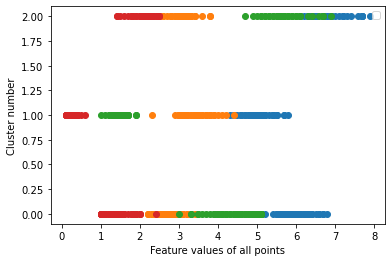

In [ ]:
# for reference, if legend not displayed
# blue -> 1st parameter
# orange -> 2nd parameter
# green -> 3rd parameter
# red -> 4th parameter


plt.legend(loc='best')
plt.scatter(data[:, 0], clusters, label="1st parameter")
plt.scatter(data[:, 1], clusters, label='2nd parameter')
plt.scatter(data[:, 2], clusters, label='3rd parameter')
plt.scatter(data[:, 3], clusters, label='4th parameter')
plt.xlabel("Feature values of all points")
plt.ylabel("Cluster number")
plt.plot()